<a href="https://colab.research.google.com/github/y47love/PYTORCH/blob/main/%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# kagglehub 설치
!pip install kagglehub


In [2]:
import kagglehub

# Apparel Dataset 다운로드
path = kagglehub.dataset_download("kaiska/apparel-dataset")

print("Path to dataset files:", path)


100%|██████████| 161M/161M [00:09<00:00, 18.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kaiska/apparel-dataset/versions/2


In [3]:
import os

# 다운로드한 데이터셋 폴더 구조 확인
for root, dirs, files in os.walk(path):
    print(root)
    for dir in dirs:
        print(f'  - {dir}')


/root/.cache/kagglehub/datasets/kaiska/apparel-dataset/versions/2
  - pink_skirt
  - brown_shoes
  - red_hoodie
  - white_shoes
  - pink_pants
  - blue_shirt
  - green_shorts
  - pink_hoodie
  - yellow_dress
  - red_shoes
  - red_shirt
  - green_shirt
  - black_pants
  - green_shoes
  - red_pants
  - black_suit
  - silver_shoes
  - black_shoes
  - brown_pants
  - black_shorts
  - brown_hoodie
  - black_shirt
  - blue_shoes
  - white_suit
  - red_dress
  - white_shorts
  - blue_pants
  - white_pants
  - green_suit
  - blue_shorts
  - silver_skirt
  - white_dress
  - black_dress
  - green_pants
  - blue_dress
  - yellow_shorts
  - yellow_skirt
/root/.cache/kagglehub/datasets/kaiska/apparel-dataset/versions/2/pink_skirt
/root/.cache/kagglehub/datasets/kaiska/apparel-dataset/versions/2/brown_shoes
/root/.cache/kagglehub/datasets/kaiska/apparel-dataset/versions/2/red_hoodie
/root/.cache/kagglehub/datasets/kaiska/apparel-dataset/versions/2/white_shoes
/root/.cache/kagglehub/datasets/kaiska/a

In [4]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 데이터 경로 설정
data_dir = '/root/.cache/kagglehub/datasets/kaiska/apparel-dataset/versions/2'

# 이미지 전처리 설정 (ResNet에 맞게 크기 조정 및 정규화)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


In [5]:
from sklearn.model_selection import train_test_split
import os
from torchvision.datasets import ImageFolder
import numpy as np

# 전체 데이터셋 불러오기
full_dataset = ImageFolder(root=data_dir, transform=transform)

# 클래스 확인
class_names = full_dataset.classes
print(f"클래스 수: {len(class_names)}")
print(f"클래스 목록: {class_names}")

# 학습용(80%)과 검증용(20%) 데이터셋으로 나누기
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size])

# DataLoader 설정
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


클래스 수: 37
클래스 목록: ['black_dress', 'black_pants', 'black_shirt', 'black_shoes', 'black_shorts', 'black_suit', 'blue_dress', 'blue_pants', 'blue_shirt', 'blue_shoes', 'blue_shorts', 'brown_hoodie', 'brown_pants', 'brown_shoes', 'green_pants', 'green_shirt', 'green_shoes', 'green_shorts', 'green_suit', 'pink_hoodie', 'pink_pants', 'pink_skirt', 'red_dress', 'red_hoodie', 'red_pants', 'red_shirt', 'red_shoes', 'silver_shoes', 'silver_skirt', 'white_dress', 'white_pants', 'white_shoes', 'white_shorts', 'white_suit', 'yellow_dress', 'yellow_shorts', 'yellow_skirt']


In [6]:
from torchvision import models
import torch.nn as nn

# 사전 학습된 ResNet18 모델 불러오기
model = models.resnet18(pretrained=True)

# 출력층 수정 (Apparel 데이터셋 클래스 수에 맞게)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))  # 클래스 수에 맞게 출력층 수정

# GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 132MB/s]


In [7]:
# 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [8]:
# 전체 이미지 개수 확인
print(f"총 이미지 개수: {len(full_dataset)}")


총 이미지 개수: 16170


In [9]:
# 현재 사용 중인 디바이스 확인
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"사용 중인 디바이스: {device}")


사용 중인 디바이스: cuda


In [10]:
from torch.utils.data import random_split, DataLoader

# 1. 전체 데이터의 10%만 사용해서 빠르게 테스트 학습
subset_size = int(0.1 * len(train_dataset))  # 10%만 사용
small_train_dataset, _ = random_split(train_dataset, [subset_size, len(train_dataset) - subset_size])

# 2. 데이터 로더 설정 (배치 크기 64로 증가)
small_train_loader = DataLoader(small_train_dataset, batch_size=64, shuffle=True)

# 3. 모델 학습 (Epoch 2로 줄임)
num_epochs = 2
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (images, labels) in enumerate(small_train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # 5번째 배치마다 진행 상황 출력
        if (batch_idx + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(small_train_loader)}], Loss: {loss.item():.4f}')

    epoch_loss = running_loss / len(small_train_loader)
    epoch_acc = 100 * correct / total
    print(f'✅ Epoch [{epoch+1}/{num_epochs}] 완료! Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')


Epoch [1/2], Batch [5/21], Loss: 1.7141
Epoch [1/2], Batch [10/21], Loss: 1.1302
Epoch [1/2], Batch [15/21], Loss: 0.9613
Epoch [1/2], Batch [20/21], Loss: 1.1142
✅ Epoch [1/2] 완료! Loss: 1.5598, Accuracy: 57.85%
Epoch [2/2], Batch [5/21], Loss: 0.8454
Epoch [2/2], Batch [10/21], Loss: 0.4861
Epoch [2/2], Batch [15/21], Loss: 0.5156
Epoch [2/2], Batch [20/21], Loss: 0.4177
✅ Epoch [2/2] 완료! Loss: 0.5136, Accuracy: 85.15%


In [11]:
# 검증 데이터셋 평가
model.eval()  # 평가 모드로 전환
val_correct = 0
val_total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        val_total += labels.size(0)
        val_correct += (predicted == labels).sum().item()

# 검증 정확도 출력
val_acc = 100 * val_correct / val_total
print(f'🧪 검증 정확도: {val_acc:.2f}%')


🧪 검증 정확도: 69.48%


In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지 시각화 함수 정의
def imshow(img, title):
    img = img.cpu().numpy().transpose((1, 2, 0))  # 텐서를 이미지로 변환 (채널, 높이, 너비 → 높이, 너비, 채널)
    mean = [0.485, 0.456, 0.406]  # 정규화 해제 (평균)
    std = [0.229, 0.224, 0.225]   # 정규화 해제 (표준편차)
    img = std * img + mean        # 정규화 복원
    img = np.clip(img, 0, 1)      # 픽셀 값을 [0, 1] 범위로 제한
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()


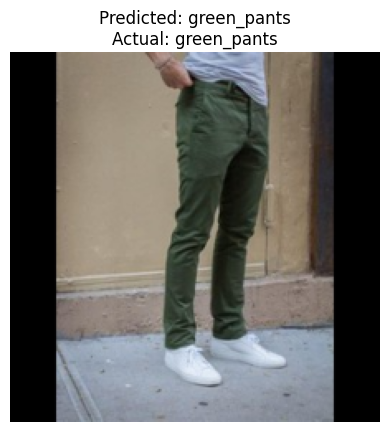

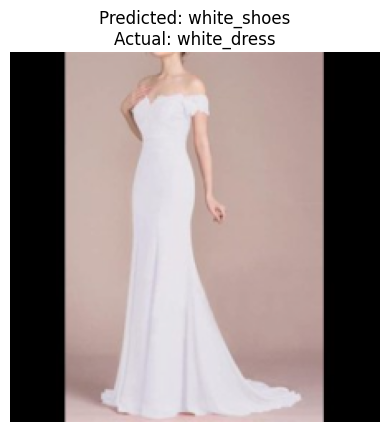

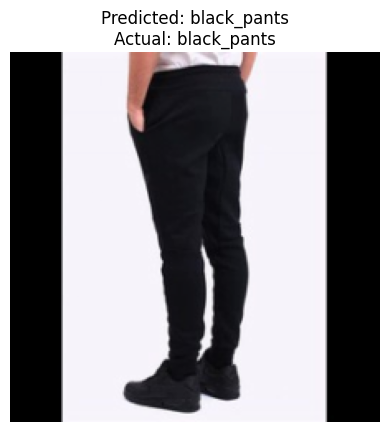

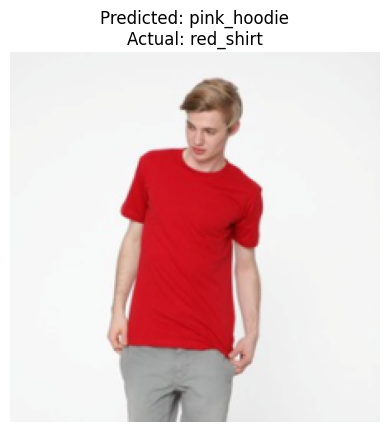

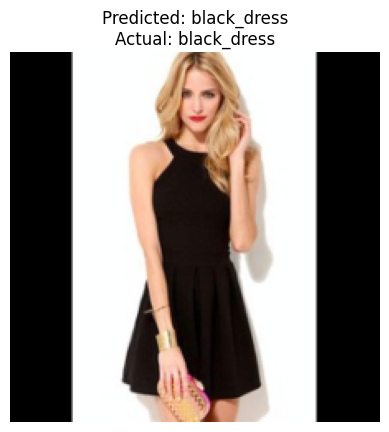

In [13]:
# 검증 데이터셋에서 샘플 이미지 가져오기
dataiter = iter(val_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

# 모델 예측
outputs = model(images)
_, preds = torch.max(outputs, 1)

# 상위 5개 이미지 시각화
for i in range(5):
    imshow(images[i], f'Predicted: {class_names[preds[i]]}\nActual: {class_names[labels[i]]}')


<Figure size 1000x1000 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47148 (\N{HANGUL SYLLABLE RYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


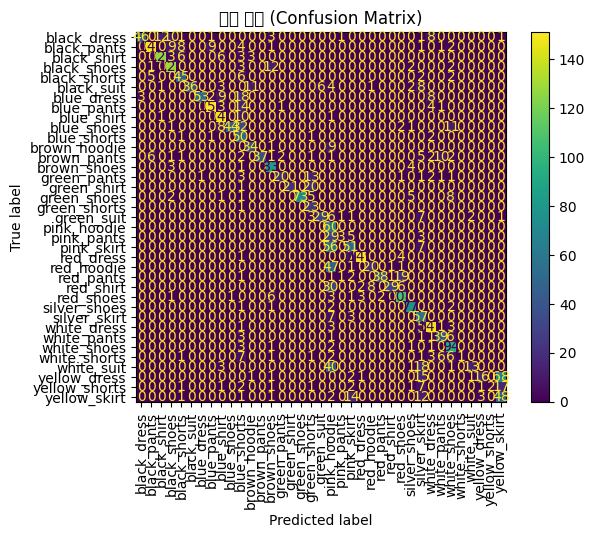

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 전체 검증 데이터에 대해 예측 수행
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# 혼동 행렬 생성
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# 혼동 행렬 시각화
plt.figure(figsize=(10, 10))
disp.plot(xticks_rotation='vertical')
plt.title("혼동 행렬 (Confusion Matrix)")
plt.show()


혼동 행렬 간단 해석
전반적인 성능

대각선(↘) 부분이 밝은 노란색으로 표시된 걸 보아, 모델이 대부분의 클래스를 정확하게 분류했습니다.
전체적으로 성능이 우수한 편입니다.
자주 혼동된 클래스

black_shoes vs black_shorts: 색상이 같아 모델이 헷갈릴 수 있음.
red_shoes vs brown_shoes: 신발 색이 비슷해 혼동 발생.
white_shirt vs white_dress: 흰색 상의와 드레스 구분이 어려움.
데이터 불균형

일부 클래스(예: silver_skirt)의 예측 수가 적은 경우, 학습 데이터가 부족했을 가능성이 있습니다.
개선 방안

Fine-Tuning: 모델의 일부 레이어를 미세 조정하면 더 나은 결과를 얻을 수 있음.
데이터 증강: 회전, 확대 등의 기법으로 헷갈리는 클래스를 더 학습.
불균형 해소: 부족한 클래스의 데이터를 추가하거나 가중치 보정.

In [15]:
# 모델 저장
torch.save(model.state_dict(), 'apparel_model.pth')
print("모델이 저장되었습니다!")


모델이 저장되었습니다!


In [ ]:
# 저장된 모델 불러오기
model.load_state_dict(torch.load('apparel_model.pth'))
model.eval()
